# Continuação Keras 1

## Exploraremos os hiper parâmetros do algoritimo

Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

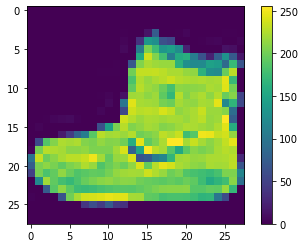

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [5]:
imagens_treino = imagens_treino/float(255)

Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 17s 10ms/step - loss: 0.5304 - accuracy: 0.8118 - val_loss: 0.4324 - val_accuracy: 0.8430
Epoch 2/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4010 - accuracy: 0.8540 - val_loss: 0.3795 - val_accuracy: 0.8635
Epoch 3/5
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3653 - accuracy: 0.8674 - val_loss: 0.3709 - val_accuracy: 0.8621
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3407 - accuracy: 0.8747 - val_loss: 0.3366 - val_accuracy: 0.8802
Epoch 5/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3236 - accuracy: 0.8814 - val_loss: 0.3463 - val_accuracy: 0.8745


Sumário do modelo

In [7]:
sumario_do_modelo = modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [8]:
# por debaixo dos panos temos um array multiplicando outro, ou seja, multiplicação de matrizes
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.01614369,  0.04433937, -0.03179505, ..., -0.0886203 ,
        -0.02003704, -0.06278953],
       [-0.01423895, -0.07789789,  0.16305736, ..., -0.05398368,
         0.04063433,  0.10694686],
       [-0.07673659,  0.06738719,  0.0434605 , ..., -0.24237178,
         0.13663565, -0.13594496],
       ...,
       [ 0.04638953, -0.01301613,  0.19350345, ...,  0.11740334,
        -0.06451973, -0.0971385 ],
       [-0.03102115,  0.0407615 ,  0.23815103, ..., -0.04381398,
        -0.01585092,  0.10405447],
       [-0.02435892, -0.13287063,  0.17901544, ...,  0.23171341,
        -0.07225949,  0.00945248]], dtype=float32)

In [21]:
# criando array com valores zerados e aleatórios
pesos_camada_dense.shape
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_pesos_camada_dense])
'''
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_pesos_camada_dense])

modelo.layers[1].get_weights()


[array([[0.688695  , 0.8867075 , 0.7922566 , ..., 0.06175664, 0.35371163,
         0.58012503],
        [0.3367466 , 0.00293873, 0.25479856, ..., 0.36175513, 0.15786596,
         0.8270259 ],
        [0.64562243, 0.823241  , 0.9110949 , ..., 0.06892245, 0.8788801 ,
         0.24642566],
        ...,
        [0.978628  , 0.33018187, 0.9177324 , ..., 0.02788671, 0.05033666,
         0.08888233],
        [0.52653456, 0.9893801 , 0.3309127 , ..., 0.6302339 , 0.06791577,
         0.25957128],
        [0.10042619, 0.18127927, 0.16046913, ..., 0.8528178 , 0.5588147 ,
         0.07804614]], dtype=float32),
 array([ 0.04566944,  0.43245676,  0.22633006,  0.1658957 , -0.04111721,
         0.2928499 ,  0.1033741 ,  0.14740866,  0.17189345,  0.39759472,
         0.21624039, -0.20754482,  0.03902457,  0.10930342,  0.11751875,
        -0.39613068, -0.01234666, -0.12908642,  0.0357306 ,  0.0255351 ,
         0.26422507,  0.08514982, -0.23361063,  0.03254829,  0.2600024 ,
        -0.01667505,  0.10765

In [10]:
#rodando o modelo com o array de pesos zerados
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3135 - accuracy: 0.8850 - val_loss: 0.3383 - val_accuracy: 0.8768
Epoch 2/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2993 - accuracy: 0.8888 - val_loss: 0.3222 - val_accuracy: 0.8855
Epoch 3/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2862 - accuracy: 0.8928 - val_loss: 0.3593 - val_accuracy: 0.8748
Epoch 4/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2802 - accuracy: 0.8944 - val_loss: 0.3237 - val_accuracy: 0.8832
Epoch 5/5
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2704 - accuracy: 0.8984 - val_loss: 0.3191 - val_accuracy: 0.8897


In [11]:
modelo.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'flatten_input'}},
  {'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'data_format': 'channels_last'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 256,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 

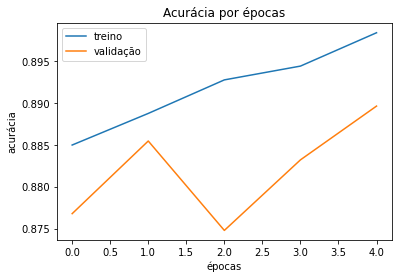

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

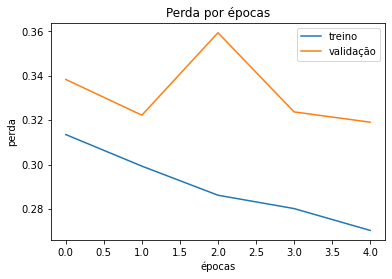

In [13]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [14]:
vieses_pesos_camada_dense = modelo.layers[1].get_weights()[1]
vieses_pesos_camada_dense

array([ 0.04566944,  0.43245676,  0.22633006,  0.1658957 , -0.04111721,
        0.2928499 ,  0.1033741 ,  0.14740866,  0.17189345,  0.39759472,
        0.21624039, -0.20754482,  0.03902457,  0.10930342,  0.11751875,
       -0.39613068, -0.01234666, -0.12908642,  0.0357306 ,  0.0255351 ,
        0.26422507,  0.08514982, -0.23361063,  0.03254829,  0.2600024 ,
       -0.01667505,  0.10765348,  0.03274364,  0.29220563,  0.09184278,
       -0.0782675 ,  0.36813542,  0.25348502, -0.08348082,  0.4457145 ,
        0.40664163, -0.0668941 , -0.06567873,  0.3244786 ,  0.04171902,
       -0.13133578,  0.27697206,  0.25279307,  0.23410015,  0.01924523,
        0.41109836,  0.14535737,  0.05184662,  0.05486129,  0.19051372,
        0.3634424 ,  0.34763792,  0.46190065,  0.48210934, -0.03812962,
        0.30773687, -0.23548163,  0.33308682, -0.01523088, -0.15824613,
       -0.06146676,  0.21392484,  0.29222953, -0.12873726,  0.33462748,
        0.00486604,  0.24462457, -0.31909743,  0.28301027, -0.04

In [15]:
#zerando as informações, criando variável com dados "0"
vieses_pesos_camada_dense_zerados = np.zeros((256))
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_pesos_camada_dense_zerados])

Salvando e carregando o modelo treinado

In [16]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por época

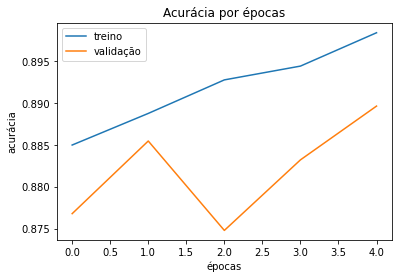

In [17]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

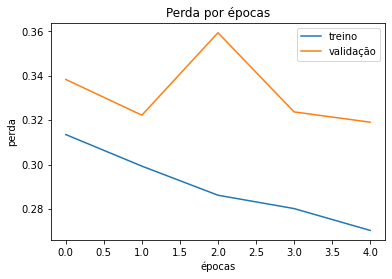

In [18]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [19]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 [==============================] - 2s 5ms/step
resultado teste: 3
número da imagem de teste: 2
313/313 [==============================] - 2s 5ms/step
resultado teste modelo salvo: 3
número da imagem de teste: 2


Avaliando o modelo

In [20]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 2s 5ms/step - loss: 2.3354 - accuracy: 0.1000
Perda do teste: 2.3353817462921143
Acurácia do teste: 0.10000000149011612
